In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
%matplotlib inline


# Introduction

A tumor is a mass of abnormal tissue. Malignant and benign tumors have different cell growth characteristics.

For this activity, you will use python libraries such as `seaborn` and `scikit-learn` to:

* explore the data using vizualization tools
* run PCA to reduce the dimension of the dataset
* split your data into training and test sets
* create a model to predict wheter a tumor is malignant (cancerous / deadly) or benign (non-cancerous / safe) based on the tumor properties. 


### Load the dataset

In [3]:
params = ["radius", "texture", "perimeter", "area",
          "smoothness", "compactness", "concavity",
          "concave points", "symmetry", "fractal dimension"];
stats = ["(mean)", "(stderr)", "(worst)"]
labels = ["patient ID", "Malignant/Benign"]

for p in params:
    for s in stats:
        labels.append(p + " " + s)

tumor_data = pd.io.parsers.read_csv("breast-cancer-dataset.dat",header=None,names=labels)

feature_labels = labels[2:]

Tumor cell features:

In [5]:
feature_labels

['radius (mean)',
 'radius (stderr)',
 'radius (worst)',
 'texture (mean)',
 'texture (stderr)',
 'texture (worst)',
 'perimeter (mean)',
 'perimeter (stderr)',
 'perimeter (worst)',
 'area (mean)',
 'area (stderr)',
 'area (worst)',
 'smoothness (mean)',
 'smoothness (stderr)',
 'smoothness (worst)',
 'compactness (mean)',
 'compactness (stderr)',
 'compactness (worst)',
 'concavity (mean)',
 'concavity (stderr)',
 'concavity (worst)',
 'concave points (mean)',
 'concave points (stderr)',
 'concave points (worst)',
 'symmetry (mean)',
 'symmetry (stderr)',
 'symmetry (worst)',
 'fractal dimension (mean)',
 'fractal dimension (stderr)',
 'fractal dimension (worst)']

How many features in this dataset? How many patients?

In [4]:
M = len(tumor_data)
N = len(feature_labels)
print("# of patients = ", M)
print("# of features = ", N)

# of patients =  560
# of features =  30


You can inspect the first few lines of your data using `tumor_data.head()`

In [6]:
tumor_data.head()

,patient ID,Malignant/Benign,radius (mean),radius (stderr),radius (worst),texture (mean),texture (stderr),texture (worst),perimeter (mean),perimeter (stderr),...,concavity (worst),concave points (mean),concave points (stderr),concave points (worst),symmetry (mean),symmetry (stderr),symmetry (worst),fractal dimension (mean),fractal dimension (stderr),fractal dimension (worst)
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Define `X` as the dataset with the features for all patients (not including the patient ID and diagnosis):

In [8]:
#grade_clear
X = tumor_data[feature_labels]

Inspect the mean value for each feature using `X.mean()`

In [9]:
#clear
X.mean()

radius (mean)                  14.089980
radius (stderr)                19.162482
radius (worst)                 91.700732
texture (mean)                650.959821
texture (stderr)                0.096387
texture (worst)                 0.103835
perimeter (mean)                0.087639
perimeter (stderr)              0.048408
perimeter (worst)               0.181229
area (mean)                     0.062817
area (stderr)                   0.402022
area (worst)                    1.208846
smoothness (mean)               2.839496
smoothness (stderr)            39.903639
smoothness (worst)              0.007044
compactness (mean)              0.025381
compactness (stderr)            0.031723
compactness (worst)             0.011750
concavity (mean)                0.020558
concavity (stderr)              0.003786
concavity (worst)              16.222898
concave points (mean)          25.532339
concave points (stderr)       106.887286
concave points (worst)        875.356964
symmetry (mean) 

Inspect the standard deviation for each feature using X.std()

In [10]:
#clear
X.std()

radius (mean)                   3.492242
radius (stderr)                 4.203534
radius (worst)                 24.059232
texture (mean)                349.012739
texture (stderr)                0.013956
texture (worst)                 0.052155
perimeter (mean)                0.078165
perimeter (stderr)              0.038238
perimeter (worst)               0.027208
area (mean)                     0.007069
area (stderr)                   0.275745
area (worst)                    0.541256
smoothness (mean)               2.005562
smoothness (stderr)            45.324666
smoothness (worst)              0.003021
compactness (mean)              0.017902
compactness (stderr)            0.030182
compactness (worst)             0.006111
concavity (mean)                0.008312
concavity (stderr)              0.002658
concavity (worst)               4.803628
concave points (mean)           6.053173
concave points (stderr)        33.307675
concave points (worst)        566.901044
symmetry (mean) 

Define `Y`, a 1d numpy array with the diagnosis for each patient. We will later use a classification algorithm to help predict patient's diagnosis (based on the features, should a patient tumor be classified as a `M` or `B`?)

In [11]:
#grade_clear
Y = tumor_data['Malignant/Benign']

For visualization purposes only, you can select a subset of the features, and use 

`seaborn.pairplot(data)`

to plot pairwise relationships in the dataset (you could plot all of the feature pairs, but this would generate a lot of plots!)

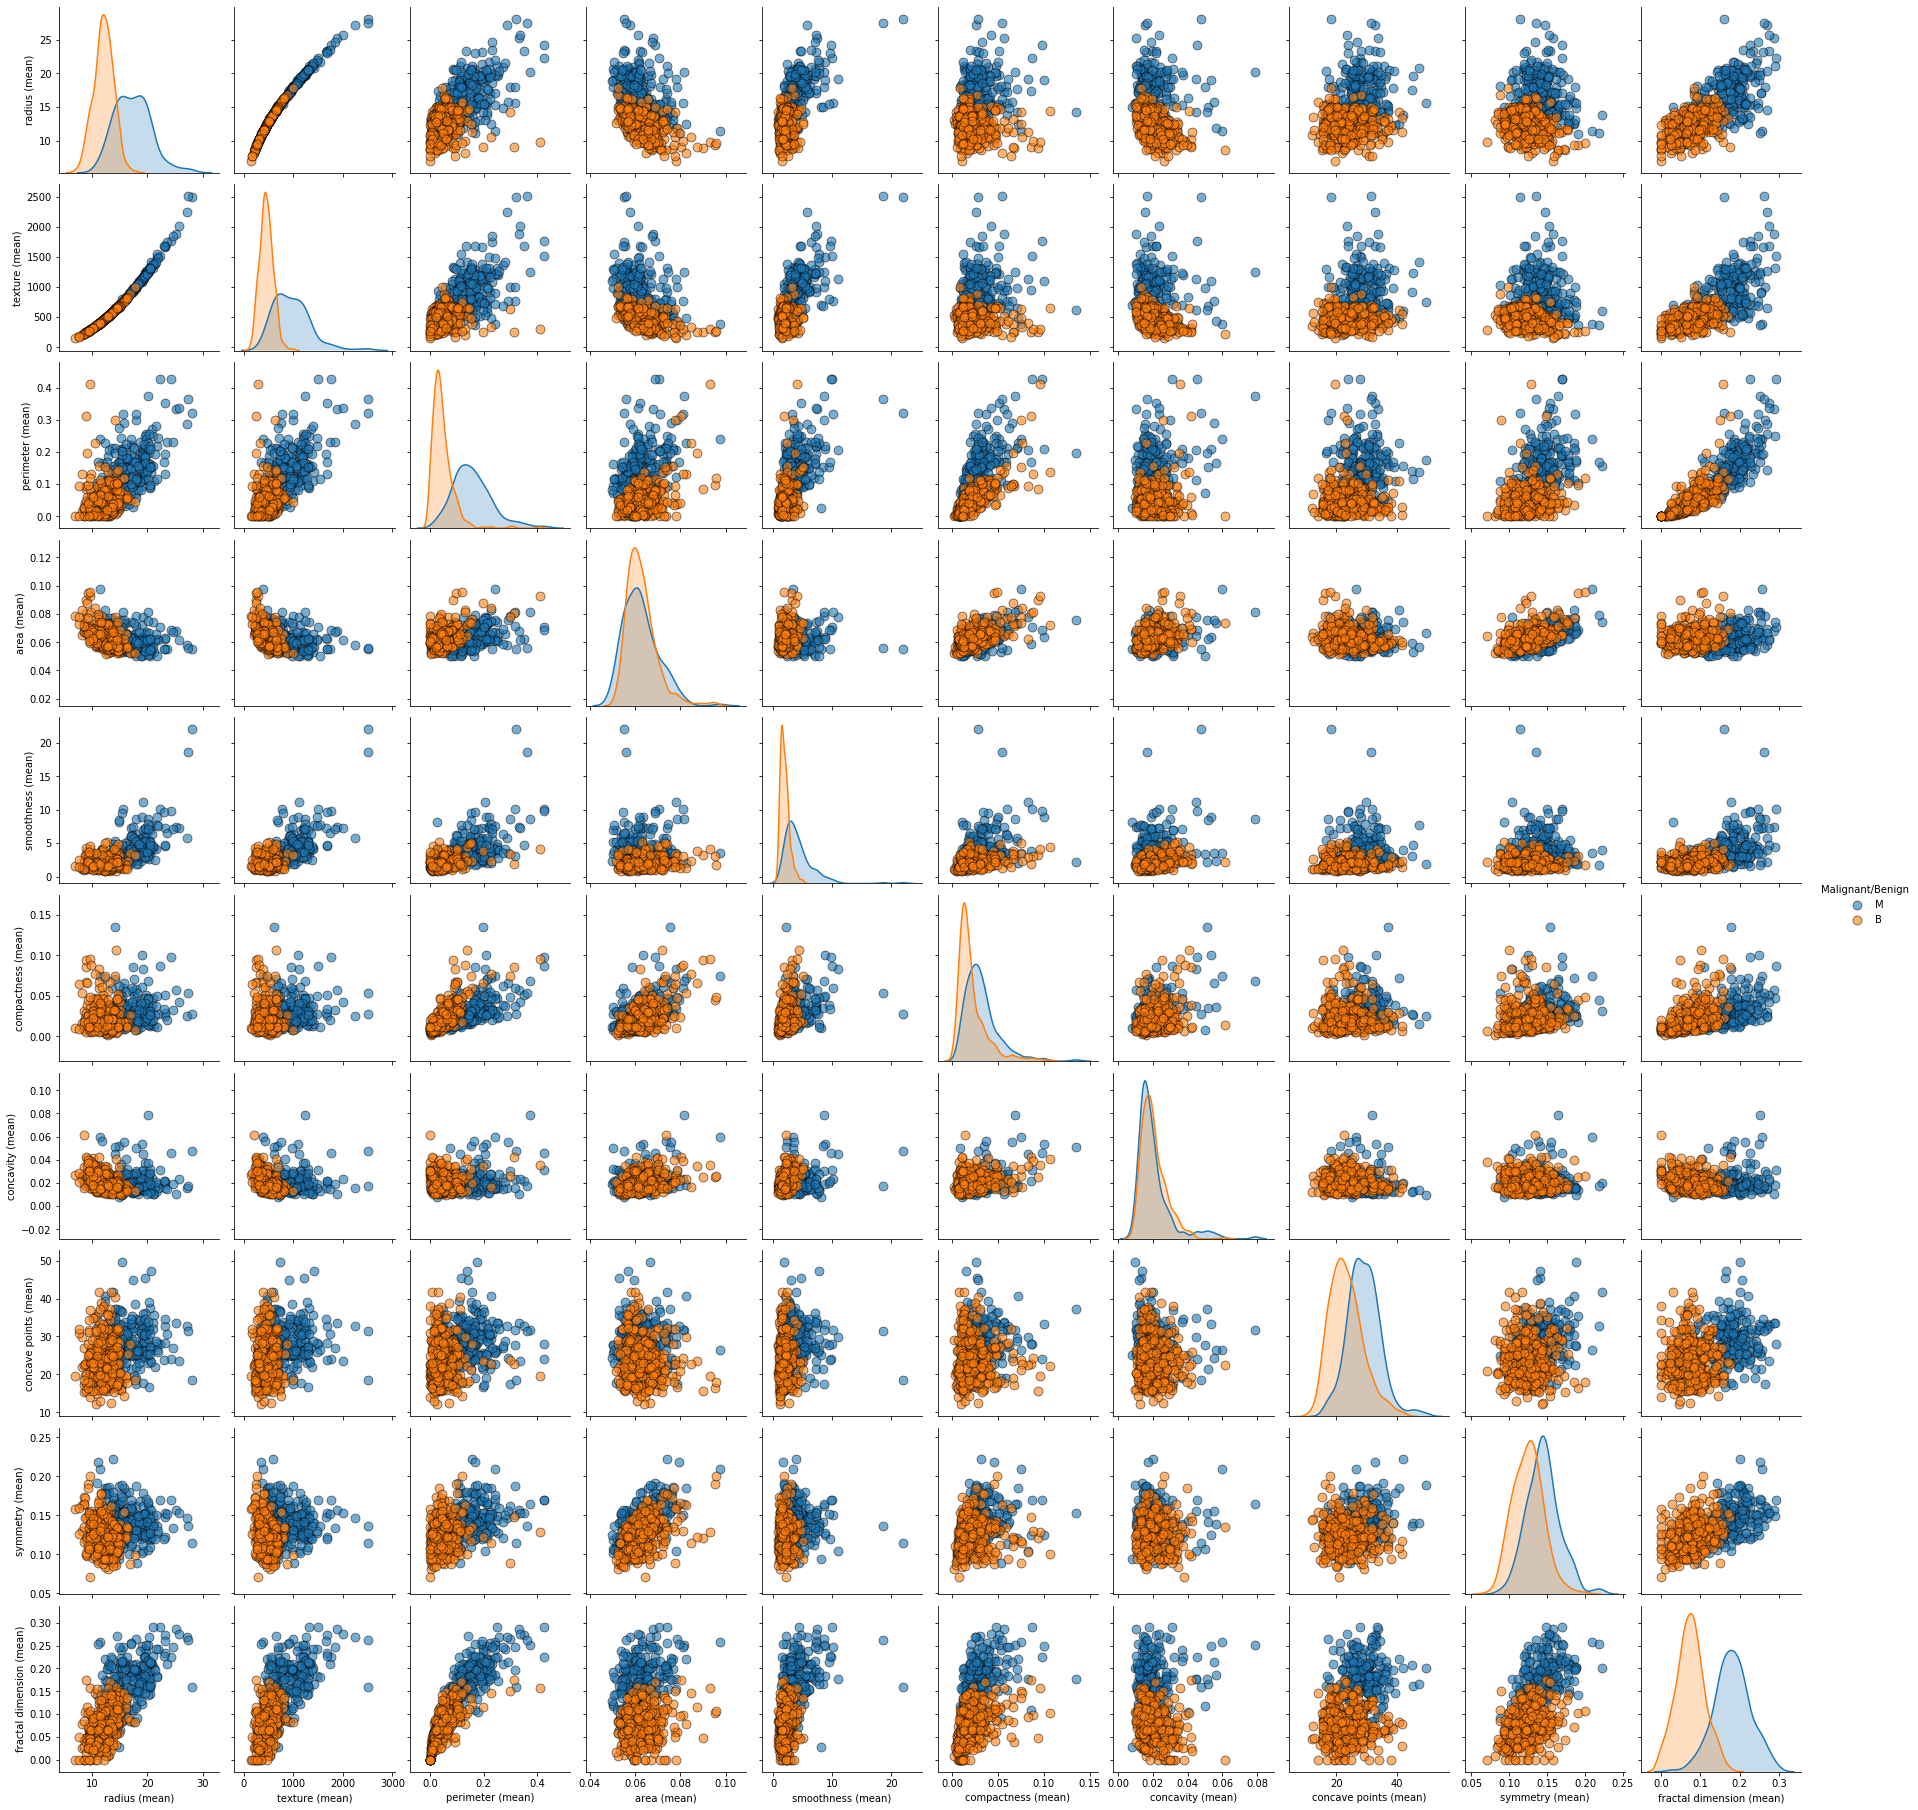

In [12]:
mean_label = [labels[1]] + labels[2::3] 
sns.pairplot(tumor_data[mean_label], hue="Malignant/Benign", plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

Or we can look at the plot of the correlation matrix for all the featues:

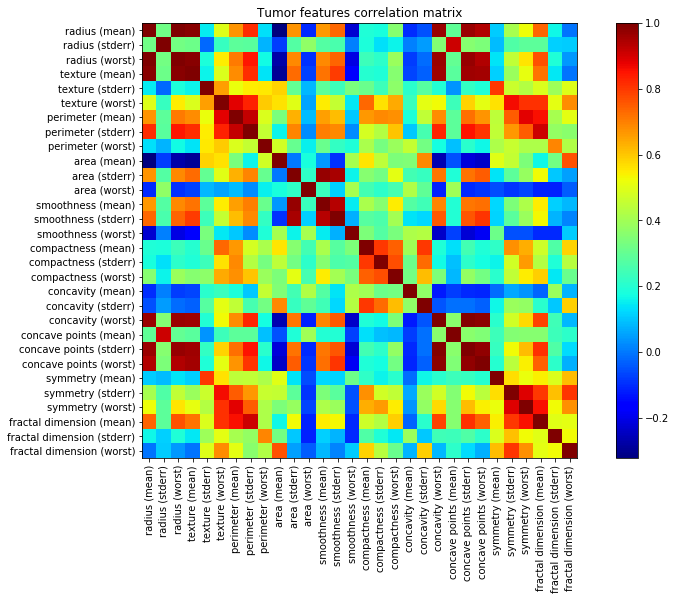

In [13]:
corr_matrix = X.corr()
# plot correlation matrix
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(111)
cax = ax1.imshow(corr_matrix, cmap=cm.get_cmap('jet'))
plt.title('Tumor features correlation matrix')
plt.grid(False)
ax1.set_xticks(np.arange(len(feature_labels)))
ax1.set_yticks(np.arange(len(feature_labels)))
ax1.set_xticklabels(feature_labels,fontsize=10,rotation=90)
ax1.set_yticklabels(feature_labels,fontsize=10)
fig.colorbar(cax)

Overwhelming? Don’t worry, in some cases the effective dimension of your problem might be much smaller than the number of the features, such as in data sets where some features are irrelevant. Is that the case here? 

# Splitting the dataset

To assess the model’s performance later, we divide the dataset into two parts: a training set and a test set. The first is used to train the system, while the second is used to evaluate the learned or trained system. 

We are going to use `sklearn.model_selection.train_test_split` to split the dataset

In [14]:
from sklearn.model_selection import train_test_split

A common splitting choice is to take 2/3 of your original data set as the training set, while the 1/3 that remains will compose the test set. Select this proportion by setting the argument `test_sizes = 0.3`. 

You should also fix the seed for the random number generator (use `seed = 42`), in order to get reproducible results.

We want to split the dataset into the set of features and diagnosis used for training (X_train,Y_train) and a set used for evaluating the trained system (X_test,Y_test). Hence, the result of  using `train_test_split` function should generate the variables `X_train, X_test, Y_train, Y_test`. 



In [16]:
#grade_clear
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# PCA

When you use algorithms for classification tasks, not all features will contribute well to the generalization capacity of your model. Some irrelevant and correlated attributes can even decrease the performance of some algorithms, contributing to overfitting, for example.

It is now your responsibility to choose the best set of features that will make your models performs better! Use  PCA to reduce the feature space of the training set while still retaining the most meaningful information about the features.

### 1) Scaling the training set

We will first **center the training data** by making the features have zero mean and unit standard deviation. We will first do this step explicility, like we have done in previous activities, before calling SVD to compute the variances. Let's revise how we were solving PCA before:

In [17]:
Xzero = X_train-X_train.mean()
Xscaled = Xzero/X_train.std()
U,sigma,Vt = la.svd(Xzero,full_matrices=False)
variance=sigma**2
total_variance = sum(variance)
print(variance/total_variance)

[9.80235252e-01 1.76388461e-02 1.90610748e-03 1.20447599e-04
 8.72383033e-05 6.84948034e-06 3.78245320e-06 8.65500617e-07
 3.55017700e-07 1.58090830e-07 6.51888543e-08 1.49593710e-08
 6.92494738e-09 4.50523385e-09 3.03706337e-09 1.27544572e-09
 8.53783527e-10 4.87077530e-10 4.12137475e-10 3.36099268e-10
 1.68075533e-10 1.30882995e-10 8.10116499e-11 5.40419239e-11
 3.54896936e-11 2.75410670e-11 7.61430739e-12 6.24731176e-12
 4.98193116e-12 1.63035465e-12]


From now on, we will use the PCA class from sklearn:

In [18]:
from sklearn.decomposition import PCA

The PCA class scales the data to have zero mean. We can also use the method

`pca.explained_variance_ratio_`

to obtain the explained variance. 

In [19]:
pca = PCA().fit(X_train)
print(pca.explained_variance_ratio_) 

[9.80235252e-01 1.76388461e-02 1.90610748e-03 1.20447599e-04
 8.72383033e-05 6.84948034e-06 3.78245320e-06 8.65500617e-07
 3.55017700e-07 1.58090830e-07 6.51888543e-08 1.49593710e-08
 6.92494738e-09 4.50523385e-09 3.03706337e-09 1.27544572e-09
 8.53783527e-10 4.87077530e-10 4.12137475e-10 3.36099268e-10
 1.68075533e-10 1.30882995e-10 8.10116499e-11 5.40419239e-11
 3.54896936e-11 2.75410670e-11 7.61430739e-12 6.24731176e-12
 4.98193116e-12 1.63035465e-12]


Note that we obtained the same explained variances when using SVD in 'Xzero'. 

In this tutorial, we will use the library `StandardScaler` to scale the training set for us. 

In [20]:
from sklearn.preprocessing import StandardScaler


`scaler = StandardScaler().fit(X_train)`


sklearn's transform's fit() just calculates the parameters (e.g. 𝜇 and 𝜎 in case of StandardScaler) and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the transformation to a particular set of examples.

`Xs_train = scaler.transform(X_train)`

We will later apply the same transformation to the testing set, using the same two parameters 𝜇 and 𝜎 (values) that you used for centering the training set.



In [21]:
#clear
# Standardizing the features
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train) 
Xs_test = scaler.transform(X_test) 

### 2) Fitting the PCA algorithm with the rescaled training set:

In summary, all we have to do now is:

In [22]:
pca = PCA().fit(Xs_train)
var_exp = pca.explained_variance_ratio_
print(var_exp)

[4.30255335e-01 1.96996395e-01 1.00129588e-01 6.58115680e-02
 5.43017590e-02 4.00702846e-02 2.22959251e-02 1.66088475e-02
 1.30348731e-02 1.15705377e-02 1.00644698e-02 9.06789620e-03
 8.28608754e-03 5.36584258e-03 2.99146910e-03 2.45522098e-03
 2.12900097e-03 1.72582342e-03 1.56893905e-03 1.04893989e-03
 9.49736547e-04 8.85518251e-04 7.65335345e-04 5.56751131e-04
 4.83118271e-04 2.65795914e-04 2.30387337e-04 5.37173237e-05
 2.67907073e-05 4.04699316e-06]


You can check above that you would obtain the same explained variances if you have used `Xscaled` to obtain the SVD

### 3) Deciding the number of principal components to use for the classification model

Plot the explained variance and the cummulative explained variance. If you want to retain the principal components that capture 80% of the variance, how many components should you choose?

[0.43025533 0.62725173 0.72738132 0.79319289 0.84749464 0.88756493
 0.90986085 0.9264697  0.93950457 0.95107511 0.96113958 0.97020748
 0.97849357 0.98385941 0.98685088 0.9893061  0.9914351  0.99316092
 0.99472986 0.9957788  0.99672854 0.99761406 0.99837939 0.99893614
 0.99941926 0.99968506 0.99991544 0.99996916 0.99999595 1.        ]


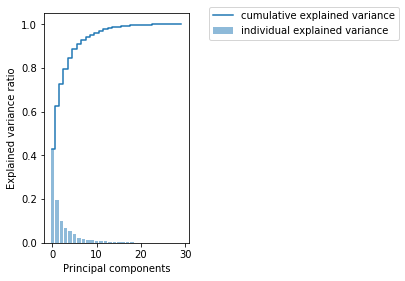

In [23]:
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()

### 4) Creating the new (reduced) dataset for the classification model

Define the variable `Z_train` the projected training set with reduced feature space that captures 90% of the variance (remember `Z_train = X_train V` where `V` is the right singular vector matrix?) 

How many components should you consider?

Two different approaches...

In [37]:
V.shape

(30, 30)

In [24]:
#clear
# if 0 < n_components < 1, it will be treated as the amount of variance being preserved
pca = PCA(.9).fit(Xs_train)
print(pca.n_components_)

7


In [25]:
#clear
# equivalent as above
pca = PCA(n_components=7).fit(Xs_train)

In [36]:
V = Vt.T
xstar = Xscaled@V[:,:7]
xstar

,0,1,2,3,4,5,6
411,-1.139316,0.377441,-0.377732,-1.132960,-0.637840,0.602785,-0.491758
248,-1.195574,0.466061,-0.329529,0.219979,-2.437248,0.444624,0.243773
536,-0.299021,-0.032812,-0.497621,0.905586,-1.285352,-0.095023,-0.377768
19,-0.438750,0.063369,-0.294364,-1.260117,0.951705,0.197177,-0.299177
394,-0.867241,0.258102,-0.250829,-0.785084,-0.421863,0.368152,-0.325148
...,...,...,...,...,...,...,...
71,-1.641253,0.504213,0.070507,-2.700512,0.283960,0.832603,0.383837
106,-0.980447,0.322981,-0.265870,-0.521918,-0.897134,0.523238,-0.494221
270,-0.400047,-0.110336,-0.592129,-1.108955,0.446822,-0.147614,-0.076498
435,-0.125584,0.162954,-0.515376,0.510282,-0.438343,0.203729,-0.471943


In [34]:
pca.components_.shape

(7, 30)

You can now project your test set onto the Principal Components of the training set.

In [26]:
Z_train = pca.transform(Xs_train)
Z_test = pca.transform(Xs_test)

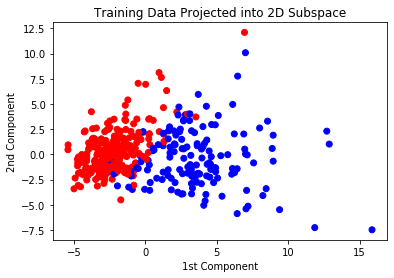

In [27]:
# set colors for each data point
C = []
classes = list(set(Y_train))
for c in Y_train:
    if c == classes[0]:
        C.append('r')
    else:
        C.append('b')

plt.figure()
plt.title("Training Data Projected into 2D Subspace")
plt.xlabel("1st Component")
plt.ylabel("2nd Component")

plt.scatter(Z_train[:, 0], Z_train[:, 1], c=C)
plt.show()

### Logistic regression

We will first use a logistic regression model. This is used for classification tasks where data points can only be a member of one class. The model can be solved either using a modified version of least squares or newton's method.

In [ ]:
from sklearn.linear_model import LogisticRegression

Make an instance of the model, using all the default parameters for now.

In [ ]:
model = LogisticRegression(solver="lbfgs")

In [ ]:
#Recall...
print(Z_train.shape,Xs_train.shape)

Training the model on the data

In [ ]:
model.fit(Z_train,Y_train)

Once you have the trained model, you can get the predicted diagnosis for the patients in the set `X_test`, and compare them with the `actual` diagnosis in `Y_test`

In [ ]:
Ypredict = model.predict(Z_test)

In [ ]:
# Accuracy: Overall, how often is the classifier correct?
(Y_test==Ypredict).mean()

In [ ]:
test_score = model.score(Z_test, Y_test)
print(test_score)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc, f1_score, confusion_matrix

Confusion matrix: describes the performance of the classification model on a set of test data for which the true values are known.

In [ ]:
# use "labels" argument to re-organize the entries in the confusion matrix
# (we typically treat malignant as positive and benign as negative)
cmat = confusion_matrix(Y_test,Ypredict, labels=["M", "B"])
print(cmat)
TP, FP, FN, TN = cmat.ravel()
npatients = Y_test.shape[0]

Confusion matrix = $ \begin{bmatrix} 
\textrm{Predicted positive and actual positive} & \textrm{Predicted positive and actual negative} \\
\textrm{Predicted negative and actual positive} & \textrm{Predicted negative and actual negative}\end{bmatrix} = \begin{bmatrix} 
\textrm{TP} & \textrm{FP} \\
\textrm{FN} & \textrm{TN} 
\end{bmatrix}$
  

TP: Predicted yes (malignant cancer), and the patients do have the disease. (How many malignant tumors are correctly identified? )

FP: Predicted yes (malignant cancer), but patients don't actually have the disease. (How many benign tumors are identified as malignant? Also known as a "Type I error.")

FN: Predicted no (benign cancer), but the patients actually have the disease. (How many malignant tumors are missed? Also known as a "Type II error.")

TN: Predicted no (benign cancer), and patients don't have the disease. (How mamy benign tumors are correctly identified?)

In [ ]:
# Accuracy: Overall, how often is the classifier correct? We sum the diagonal of the confusion matrix!
(TP+TN)/npatients 

Accuracy is not always a reliable metric for the real performance of a classifier. Let's say there are 100 patients and 5 have malignant cancer. If the model classifies all the 100 patients as not having cancer, than the overall accuracy is 95% (TP = 0, TN = 95, FN = 5, FP = 0). 

Let's take a look at other metrics:

True positive rate (TPR), or sensitivity or recall: When it's actually yes, how often does it predict yes?
TPR = TP/(TP+FN)

True negative rate (TNR) or specificity:  When it's actually no, how often does it predict no?
TNR = TN/(FP+TN)   

For the example above, the classifier has 100% specificity (predicts 100% of the benign cancers) and 0% sensitivity (fails to classify all cancerous tumors).

The "best" metric to use will depend on the classification problem. Back to our original dataset...

In [ ]:
# True positive rate (TPR), or sensitivity or recall: When it's actually yes, how often does it predict yes?
TPR = TP/(TP+FN)
print(TPR)

In [ ]:
# True negative rate(TNR) or specificity:  When it's actually no, how often does it predict no?
TNR = TN/(FP+TN)   
print(TNR)

In [ ]:
# Precision: When it predicts yes, how often is it correct?
p = TP/(TP+FP)
print(p)

### Checking other algorithms:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

In [ ]:
# Determine accuracy of classifier given data pairs (X, Y)
def accuracy(classifier, X, Y):
    Ypredict = classifier.predict(X)
    return (Y==Ypredict).mean()

def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    print("{:34s}{:15s}{:12s}{:12s}".format("Classifiers", "Test-score", "TPR", "TNR"))
    train_score = []
    test_score = []
    labels = []

    for classifier_name, classifier in list(dict_classifiers.items()):
        
        # Fit the model
        labels.append(classifier_name)
        classifier.fit(X_train, Y_train)
        # Make predictions on the test data
        predictions = classifier.predict(X_test)
        cmat = confusion_matrix(Y_test, predictions, labels=["M", "B"])
        TP, FP, FN, TN = cmat.ravel()
        # Get scores
        train_score.append(accuracy(classifier, X_train, Y_train))
        test_score.append(accuracy(classifier, X_test, Y_test))
        if verbose:
            print("{c:30}{t1:12f}{t2:12f}{t3:12f}".format(c=classifier_name,t1=test_score[-1], t2=TP/(TP+FN), t3=TN/(FP+TN) ), )


In [ ]:
batch_classify(Z_train, Y_train, Z_test, Y_test, verbose = True)

In [ ]:
batch_classify(Xs_train, Y_train, Xs_test, Y_test, verbose = True)